In [ ]:
pip install --user freesurfer-stats

CMD="/home/global/anaconda2/bin/python /home/global/freesurfer6_0/bin/aparcstats2table --hemi lh --subjects ";\
for SUBJ in `ls -1 ${SUBJECTS_DIR}`; do CMD="${CMD} ${SUBJ}"; done ;\
CMD="${CMD} --meas thickness --skip  --tablefile lh.aparc_allsubj.txt";\
echo ${CMD}; eval ${CMD};

In [1]:
import nibabel as nib
import numpy as np
import os,sys
import pandas as pd 
import glob as glob
import plotnine as p9
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import scipy as sp
from scipy import stats
import import_ipynb
sys.path.append('/home/romain/SVN/python/romain')
from Predistim_Library import *
import seaborn as sns
import statsmodels as sm

importing Jupyter notebook from Predistim_Library.ipynb


In [2]:
df = pd.read_excel(os.path.join(STUDY_PATH,'groupFOG_TO.xlsx'),engine='openpyxl',index_col=0,converters={'Identifiant':str})
df=df.set_index(['Identifiant'])
df.describe

<bound method NDFrame.describe of              FOG4_V0  FOG4_V1  Difference_FOGQ4_V0_V1 MODE_EVOL_FOGQ4  GROUPE  \
Identifiant                                                                     
01005            3.0      1.0                     2.0               C     3.0   
01006            3.0      3.0                     0.0               B     2.0   
01007            3.0      3.0                     0.0               B     2.0   
01008            0.0      3.0                    -3.0               A     1.0   
01009            1.0      1.0                     0.0               B     2.0   
...              ...      ...                     ...             ...     ...   
20011            2.0      2.0                     0.0               B     2.0   
20012            3.0      3.0                     0.0               B     2.0   
20015            3.0      0.0                     3.0               C     3.0   
NaN              NaN      NaN                     NaN             NaN     N

In [3]:
print(nib.__version__)
print(STUDY_PATH)

3.0.1
/NAS/deathrow/protocoles/predistim


In [4]:
#df = pd.read_excel(os.path.join(STUDY_PATH,'groupFOG_TO.xlsx'),engine='openpyxl',index_col=0,converters={'PatientNB':str})
df = pd.read_csv(os.path.join(STUDY_PATH,'Group_FOG_CT_RV.csv'),sep=';',dtype={'Identifiant':str},index_col=0)
print(df.index)
df_CT = pd.read_csv(os.path.join(STUDY_PATH,'GlasserValues_CT.csv'),sep=';',index_col=0)
df_CT=df.merge(df_CT,on='Identifiant')
print(df_CT.shape)
df_R2 = pd.read_csv(os.path.join(STUDY_PATH,'GlasserValues_R2.csv'),sep=';',index_col=0)
df_R2=df.merge(df_R2,on='Identifiant')
print(df_R2.shape)
df_QSM = pd.read_csv(os.path.join(STUDY_PATH,'GlasserValues_QSM.csv'),sep=';',index_col=0)
df_QSM=df.merge(df_QSM,on='Identifiant')
print(df_QSM.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/NAS/deathrow/protocoles/predistim/Group_FOG_CT_RV.csv'

In [33]:
df.columns

Index(['GROUP', 'SEXE', 'AGE', 'DUREE_ENTRE_1ER_SYMPTOME_ET_V0', 'Centre',
       'CGIS_V0'],
      dtype='object')

In [102]:
GP1=df.query('GROUP==1')[['GROUP','SEXE','AGE','DUREE_ENTRE_1ER_SYMPTOME_ET_V0','Centre','CGIS_V0']]
GP2=df.query('GROUP==2')[['GROUP','SEXE','AGE','DUREE_ENTRE_1ER_SYMPTOME_ET_V0','Centre','CGIS_V0']]
GP3=df.query('GROUP==3')[['GROUP','SEXE','AGE','DUREE_ENTRE_1ER_SYMPTOME_ET_V0','Centre','CGIS_V0']]
GP=pd.concat([GP1,GP2,GP3])

In [103]:
GP.index
for SUBJ in GP.index :
    #CMD="qbatch -q two_job_q -oe /NAS/deathrow/protocoles/predistim/code/log/ -N hcpPP_"+SUBJ+" bash /home/romain/SVN/scripts/renaud/T1/T1_Postprocessing.sh -sd /NAS/deathrow/protocoles/predistim/HCP/ -subj "+SUBJ
    #print(CMD)
    FILE=os.path.join(STUDY_PATH,'HCP',str(SUBJ),'MNINonLinear','fsaverage_LR32k','*.thickness.32k_fs_LR.dscalar.nii')
    if not os.path.isfile(FILE) :
        #CMD="rm /NAS/deathrow/protocoles/predistim/HCP/"+SUBJ+";qbatch -q two_job_q -oe /NAS/deathrow/protocoles/predistim/code/log/ -N hcp_"+SUBJ+" /home/renaud/SVN/scripts/renaud/T1/T1_ProcessingAllSteps.sh -sd /NAS/deathrow/protocoles/predistim/HCP_FOG2/ -subj "+SUBJ+" -t1 /NAS/deathrow/protocoles/predistim/3DT1/"+SUBJ+"/3DT1_"+SUBJ+".nii.gz"
        print(FILE)

/NAS/deathrow/protocoles/predistim/HCP/01008GM/MNINonLinear/fsaverage_LR32k/*.thickness.32k_fs_LR.dscalar.nii
/NAS/deathrow/protocoles/predistim/HCP/01021CT/MNINonLinear/fsaverage_LR32k/*.thickness.32k_fs_LR.dscalar.nii
/NAS/deathrow/protocoles/predistim/HCP/01023CF/MNINonLinear/fsaverage_LR32k/*.thickness.32k_fs_LR.dscalar.nii
/NAS/deathrow/protocoles/predistim/HCP/01026AF/MNINonLinear/fsaverage_LR32k/*.thickness.32k_fs_LR.dscalar.nii
/NAS/deathrow/protocoles/predistim/HCP/01030DM/MNINonLinear/fsaverage_LR32k/*.thickness.32k_fs_LR.dscalar.nii
/NAS/deathrow/protocoles/predistim/HCP/01031FB/MNINonLinear/fsaverage_LR32k/*.thickness.32k_fs_LR.dscalar.nii
/NAS/deathrow/protocoles/predistim/HCP/01033DG/MNINonLinear/fsaverage_LR32k/*.thickness.32k_fs_LR.dscalar.nii
/NAS/deathrow/protocoles/predistim/HCP/01034UG/MNINonLinear/fsaverage_LR32k/*.thickness.32k_fs_LR.dscalar.nii
/NAS/deathrow/protocoles/predistim/HCP/01040LC/MNINonLinear/fsaverage_LR32k/*.thickness.32k_fs_LR.dscalar.nii
/NAS/death

In [6]:
lhparc = pd.read_csv(os.path.join(STUDY_PATH,'lh.aparc_allsubj.txt'),sep=',',index_col='SUBJ')
rhparc = pd.read_csv(os.path.join(STUDY_PATH,'rh.aparc_allsubj.txt'),sep=',',index_col='SUBJ')
del lhparc['lh.aparc.thickness']
del rhparc['rh.aparc.thickness']
FOGData = pd.read_excel(os.path.join(STUDY_PATH,'FOG_M2.xlsx'),index_col=0,engine='openpyxl')

In [21]:
CQData = pd.read_excel(CQ_FILE,index_col=0,engine='openpyxl')
CQData = CQData[CQData.index.notnull()]

In [1]:
#CQT1=CQData.query('QC_3DT1>1').index
CQT1=CQData.query('3<QC_3DT1').index
for SUBJ in CQT1 :
    CMD="qbatch -q two_job_q -oe /NAS/deathrow/protocoles/predistim/code/log/ -N hcpPP_"+SUBJ+" bash /home/romain/SVN/scripts/renaud/T1/T1_Postprocessing.sh -sd /NAS/deathrow/protocoles/predistim/HCP/ -subj "+SUBJ
    print(CMD)
    FILE=os.path.join(STUDY_PATH,'HCP',SUBJ,'MNINonLinear','fsaverage_LR32k',SUBJ+'.thickness.32k_fs_LR.dscalar.nii')
    if not os.path.isfile(FILE) :
        CMD="rm /NAS/deathrow/protocoles/predistim/HCP/"+SUBJ+";qbatch -q two_job_q -oe /NAS/deathrow/protocoles/predistim/code/log/ -N hcp_"+SUBJ+" /home/renaud/SVN/scripts/renaud/T1/T1_ProcessingAllSteps.sh -sd /NAS/deathrow/protocoles/predistim/HCP_FOG2/ -subj "+SUBJ+" -t1 /NAS/deathrow/protocoles/predistim/3DT1/"+SUBJ+"/3DT1_"+SUBJ+".nii.gz"
        print(CMD)

NameError: name 'CQData' is not defined

In [68]:
for SUBJ in df.index:
#    print(SUBJ)
#    CQT1=0;CQTE=0
    CQT1,CQTE=getCQT1AndMultiTE(SUBJ)
    print(CQT1,CQTE)

3.0 -1
3.0 -1


KeyboardInterrupt: 

In [28]:
#CQData.query('3<QC_3DT1')
len(CQData.query('QC_3DT1>3'))

84

In [34]:
for SUBJ_DIR in glob.glob(os.path.join(STUDY_PATH,'FS60','*')):
    SUBJ=SUBJ_DIR.split('/')[6]
    CMD="qbatch -q two_job_q -oe /NAS/deathrow/protocoles/predistim/code/log/ -N PPhcp_"+SUBJ+" bash /home/romain/SVN/scripts/renaud/T1/T1_Postprocessing.sh -sd /NAS/deathrow/protocoles/predistim/HCP/ -subj "+SUBJ
    print(CMD)

qbatch -q two_job_q -oe /NAS/deathrow/protocoles/predistim/code/log/ -N PPhcp_01005LB bash /home/romain/SVN/scripts/renaud/T1/T1_Postprocessing.sh -sd /NAS/deathrow/protocoles/predistim/HCP/ -subj 01005LB
qbatch -q two_job_q -oe /NAS/deathrow/protocoles/predistim/code/log/ -N PPhcp_01010VD bash /home/romain/SVN/scripts/renaud/T1/T1_Postprocessing.sh -sd /NAS/deathrow/protocoles/predistim/HCP/ -subj 01010VD
qbatch -q two_job_q -oe /NAS/deathrow/protocoles/predistim/code/log/ -N PPhcp_01016BP bash /home/romain/SVN/scripts/renaud/T1/T1_Postprocessing.sh -sd /NAS/deathrow/protocoles/predistim/HCP/ -subj 01016BP
qbatch -q two_job_q -oe /NAS/deathrow/protocoles/predistim/code/log/ -N PPhcp_01021CT bash /home/romain/SVN/scripts/renaud/T1/T1_Postprocessing.sh -sd /NAS/deathrow/protocoles/predistim/HCP/ -subj 01021CT
qbatch -q two_job_q -oe /NAS/deathrow/protocoles/predistim/code/log/ -N PPhcp_01023CF bash /home/romain/SVN/scripts/renaud/T1/T1_Postprocessing.sh -sd /NAS/deathrow/protocoles/pred

In [78]:
NB=81
np.savetxt(os.path.join(STUDY_PATH,'results','FSL_PALM','FOG_81_CQ4','design.csv'),np.round(np.concatenate((np.concatenate((np.zeros(NB).reshape(NB,1),np.eye(NB)),axis=1),np.concatenate((np.ones(NB).reshape(NB,1),np.eye(NB)),axis=1)))),fmt='%1.0d')
#np.concatenate(np.ones(1).reshape(1,1),np.zeros(83))
np.savetxt(os.path.join(STUDY_PATH,'results','FSL_PALM','FOG_81_CQ4','contrast.csv'),np.concatenate((np.ones([2,1]),np.zeros([2,NB])),axis=1),fmt='%1.0d')

In [ ]:
test=FOGData.join(CQT1).join(lhparc,lsuffix='lh_').join(rhparc,lsuffix='rh_')

In [ ]:
#~ CMD="";for file in `ls [B,1]*/*/MNINonLinear/fsaverage_LR32k/*.thickness.32k_fs_LR.dscalar.nii`; do CMD=$CMD" "$file; done; eval "wb_shortcuts -cifti-concatenate ../results/FSL_PALM/thickness.dscalar.nii" $CMD

In [51]:
GP.to_csv(os.path.join(STUDY_PATH,'GroupesFOG.csv'))

In [28]:
f=open(os.path.join(STUDY_PATH,'GlasserValues_QSM.csv'),'a')
for SUBJ_DIR in df.index : #glob.glob(os.path.join(STUDY_PATH,'results','ROIGlasser','FOG_CT','CT.*.L.pscalar.nii')):
    #SUBJ=SUBJ_DIR.split('/')[8]
    #print(SUBJ.split('.')[1])    
    file=os.path.join(STUDY_PATH,'results','ROIGlasser','FOG_QSM','QSM.'+SUBJ_DIR[:-2]+'.L.pscalar.nii')
    if os.path.isfile(file):
        print(SUBJ_DIR)
        test_gii_L = nib.load(file)
        test_gii_R = nib.load(file.replace(".L.",".R."))
        np.savetxt(f,np.concatenate((np.asanyarray(test_gii_L.dataobj),np.asanyarray(test_gii_R.dataobj)),axis=1))
f.close()        

01014DE
01016BP
01019LJ
01020VM
01023CF
01024FC
01025RE
01026AF
01028SA
01029LL
01030DM
01031FB
01034UG
01037DA
01040LC
01044SD
01046AA
06006TT
06007CM
06010FC
06012DH
06023AG
06026CF
06027RC
06029BN
06030CS
06031MD
06032BM
06033MJ
06037GM
06038ML
06039GJ
06041RT
06042AJ
06043VR
06045AG
06046DE
06047HJ
06049RY
06050BB
06052RR
06060BE
06061PC
06062AM
06064PD
06065MJ
06066FC
06068CC
06070BJ
06072SS
06073LD
06079TF
07018MD
07020NJ
07025MS
07027BJ
07040PP
07051MC
07057SB
07058PP
08001PV
08003LC
08004PY
08005DY
08007LV
08008AF
08009BC
08010SF
08011LH
08012SF
08013CN
08020VJ
08022CM
08033MA
08034CC
08035LM
17003GM
17004BP
17006LN
17008BP
17009DL
17010BG
17011MG
17014PP
17017FH
17018GJ
17019JF
17020LP
17021BM
17022PG
17023GY
17026AM
17027JA
17029NM
17030GR
17032TJ
17033GR
17034BM
17038HC
17040MD
17046CE
17047FG
17050PD
17051AV
17053KC
17054BL
17055DA
17056BA
17060JR
17062GD
17069BB
17070MJ
17071PM
17072PF
17075GR
17076CJ
17077BS
17079DM
17080RC
19001HF
19008GG
19009AP
19010DJ
19011LA
19014GC


In [35]:
metric_gii = nib.load('/NAS/deathrow/protocoles/predistim/results/ROIGlasser/FOG_R2/R2.01014.L.pscalar.nii')
#test2=label.get_data()
print(metric_gii.header.get_axis(1).name)
metric_gii = nib.load('/NAS/deathrow/protocoles/predistim/results/ROIGlasser/FOG_R2/R2.01014.R.pscalar.nii')
print(metric_gii.header.get_axis(1).name)

['L_V1_ROI' 'L_MST_ROI' 'L_V6_ROI' 'L_V2_ROI' 'L_V3_ROI' 'L_V4_ROI'
 'L_V8_ROI' 'L_4_ROI' 'L_3b_ROI' 'L_FEF_ROI' 'L_PEF_ROI' 'L_55b_ROI'
 'L_V3A_ROI' 'L_RSC_ROI' 'L_POS2_ROI' 'L_V7_ROI' 'L_IPS1_ROI' 'L_FFC_ROI'
 'L_V3B_ROI' 'L_LO1_ROI' 'L_LO2_ROI' 'L_PIT_ROI' 'L_MT_ROI' 'L_A1_ROI'
 'L_PSL_ROI' 'L_SFL_ROI' 'L_PCV_ROI' 'L_STV_ROI' 'L_7Pm_ROI' 'L_7m_ROI'
 'L_POS1_ROI' 'L_23d_ROI' 'L_v23ab_ROI' 'L_d23ab_ROI' 'L_31pv_ROI'
 'L_5m_ROI' 'L_5mv_ROI' 'L_23c_ROI' 'L_5L_ROI' 'L_24dd_ROI' 'L_24dv_ROI'
 'L_7AL_ROI' 'L_SCEF_ROI' 'L_6ma_ROI' 'L_7Am_ROI' 'L_7PL_ROI' 'L_7PC_ROI'
 'L_LIPv_ROI' 'L_VIP_ROI' 'L_MIP_ROI' 'L_1_ROI' 'L_2_ROI' 'L_3a_ROI'
 'L_6d_ROI' 'L_6mp_ROI' 'L_6v_ROI' 'L_p24pr_ROI' 'L_33pr_ROI'
 'L_a24pr_ROI' 'L_p32pr_ROI' 'L_a24_ROI' 'L_d32_ROI' 'L_8BM_ROI'
 'L_p32_ROI' 'L_10r_ROI' 'L_47m_ROI' 'L_8Av_ROI' 'L_8Ad_ROI' 'L_9m_ROI'
 'L_8BL_ROI' 'L_9p_ROI' 'L_10d_ROI' 'L_8C_ROI' 'L_44_ROI' 'L_45_ROI'
 'L_47l_ROI' 'L_a47r_ROI' 'L_6r_ROI' 'L_IFJa_ROI' 'L_IFJp_ROI'
 'L_IFSp_ROI' 'L_IFSa_ROI' 'L_p9

In [73]:
mylist=list(df.columns)
print(mylist)
mylist.append(list(test_gii.header.get_axis(1).name))
print(mylist)
pd.DataFrame(pd.np.column_stack([df, np.asanyarray(test_gii.dataobj)]),columns=mylist)

['FOG4_V0', 'FOG4_V1', 'Difference_FOGQ4_V0_V1', 'MODE_EVOL_FOGQ4', 'GROUPE', 'FOGQ_totV0', 'FOGQ_totV1', 'Difference_FOGQ_totV0_V1', 'AGE', 'BMI', 'SEXE', 'Centre', 'DUREE_ENTRE_1ER_SYMPTOME_ET_V0', 'HOEHN_YAHR_V0_OFF', 'HOEHN_YAHR_V0_ON', 'CGIS_V0', 'LEDD_V0', 'PDQ39_V0', 'MOCA_V0', 'LARS_TOT_V0', 'HAMA_V0', 'HAMD_V0', 'UPDRS_I_V0', 'UPDRS_II_OFF_V0', 'UPDRS_II_ON_V0', 'UPDRS_III_OFF_V0', 'UPDRS_III_ON_V0', 'V1_MDSUPDRS_III.11_ONstimOFFdrug', 'V1_MDSUPDRS_III.11_WORSTOFF', 'V1_MDSUPDRS_III.11_OFFstimONdrug', 'V1_MDSUPDRS_III.11_BESTON', 'SensiFOGaux2a1an', 'SensiFOGdopa1an', 'SensiFOGstima1an', 'dopasensibilite_V0', 'V0_OFF_FREEZING', 'V0_ON_FREEZING', 'dopasensibilite_FOG_V0', 'Somme_scores_axiaux_III_V0_OFF', 'Somme_scores_axiaux_III_V0_ON', 'UPDRS_IV_V0', 'INF_HEM_VASC']
['FOG4_V0', 'FOG4_V1', 'Difference_FOGQ4_V0_V1', 'MODE_EVOL_FOGQ4', 'GROUPE', 'FOGQ_totV0', 'FOGQ_totV1', 'Difference_FOGQ_totV0_V1', 'AGE', 'BMI', 'SEXE', 'Centre', 'DUREE_ENTRE_1ER_SYMPTOME_ET_V0', 'HOEHN_YAHR_V

/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 331 and the array at index 1 has size 1

In [30]:
metric_gii = nib.load(os.path.join(STUDY_PATH,'HCP/01033DG/MNINonLinear/fsaverage_LR32k/01033DG.L.thickness.32k_fs_LR.shape.gii'))
label = nib.load( '/NAS/tupac/renaud/HCP/Glasser_et_al_2016_HCP_MMP1.0_RVVG/HCP_PhaseTwo/Q1-Q6_RelatedParcellation210/MNINonLinear/fsaverage_LR32k/Q1-Q6_RelatedParcellation210.L.CorticalAreas_dil_Colors.32k_fs_LR.dlabel.nii')

# Selection ds dataframe CT des sujets avec un R2

In [66]:
df_CT[df_CT.index.isin(df_R2.index)].to_csv(os.path.join(STUDY_PATH,'CTlimited2R2.csv'))

,DUREE_ENTRE_1ER_SYMPTOME_ET_V0,AGE
DUREE_ENTRE_1ER_SYMPTOME_ET_V0,1.000000,0.247299
AGE,0.247299,1.000000


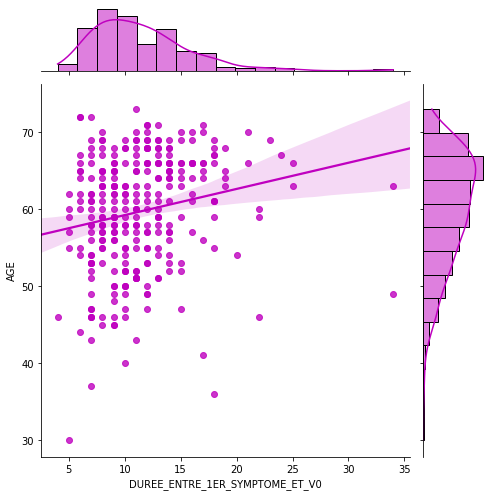

In [108]:
#malist=set(df[df['GROUP']==1].index)
#df_QSM.iloc(malist)
#test = pd.concat([df,df_CT],axis=1)

#col='L_47s_ROI'
#df_CT[df_CT['GROUP']==1]
#df_CT[df['GROUP']==1][col].values
#stat_val,p_val=sp.stats.f_oneway(df_CT[df['GROUP']==1][col].values,df_CT[df['GROUP']==2][col].values,df_CT[df['GROUP']==3][col].values,df_CT[df['GROUP']==4][col].values)
g = sns.jointplot(x="DUREE_ENTRE_1ER_SYMPTOME_ET_V0", y="AGE",data=df_CT,kind="reg", truncate=False,color="m", height=7)
df_CT[["DUREE_ENTRE_1ER_SYMPTOME_ET_V0","AGE"]].corr(method='spearman')

,DUREE_ENTRE_1ER_SYMPTOME_ET_V0,AGE
DUREE_ENTRE_1ER_SYMPTOME_ET_V0,1.000000,0.247299
AGE,0.247299,1.000000


[1.50950313e-145 3.07561061e-002]
GROUP
1    2.361656
2    2.379908
3    2.272111
4    2.298510
Name: R_RI_ROI, dtype: float64 GROUP
1    0.154796
2    0.187078
3    0.131923
4    0.152508
Name: R_RI_ROI, dtype: float64


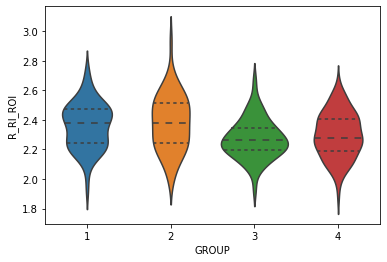

In [94]:
p_vals=[]
for col in df_QSM.columns :
    y = unconfound(df_CT[col],df_CT[df_CT.columns[1:6]].values)
    stat_val,p_val=sp.stats.f_oneway(y[df_CT['GROUP']==1],y[df_CT['GROUP']==2],y[df_CT['GROUP']==3],y[df_CT['GROUP']==4])
    p_vals.append(p_val)

b_fdr,ps_fdr=sm.stats.multitest.fdrcorrection(p_vals,alpha=0.05,method='indep',is_sorted=False)  
print(ps_fdr[b_fdr])
df_QSM.columns[b_fdr]

ax = sns.violinplot(x="GROUP", y="R_RI_ROI",data=df_CT,split=True,inner="quartile")
print(df_CT.groupby(['GROUP']).mean()['R_RI_ROI'],df_CT.groupby(['GROUP']).std()['R_RI_ROI'])

In [49]:
df_CT_R2=df_CT.merge(df_R2,on="Identifiant",suffixes=("_CT", "_R2"),)
p_vals=[]
for col in df_QSM.columns :
    val=np.corrcoef(df_CT_R2[col+"_R2"].values,df_CT_R2[col+"_CT"].values)[0][1]
    if(val>0.5):
        print(col,val)

GROUP 1.0
SEXE 1.0
AGE 1.0
DUREE_ENTRE_1ER_SYMPTOME_ET_V0 1.0
Centre 1.0
CGIS_V0 1.0


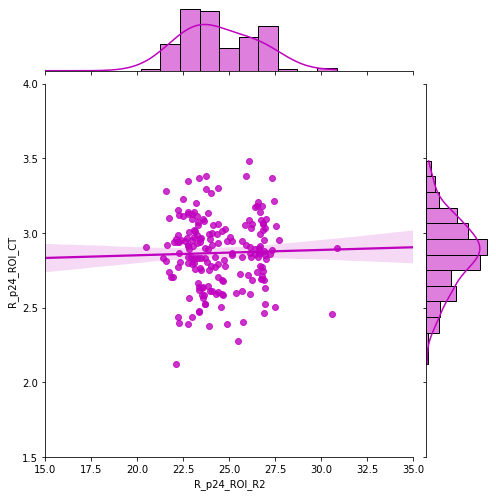

In [50]:
g = sns.jointplot(x=col+"_R2", y=col+"_CT",data=df_CT_R2,kind="reg", truncate=False,xlim=(15,35), ylim=(1.5,4),color="m", height=7)

# R2 avec regression du CT

In [36]:
df_CT_R2=df_CT.merge(df_R2,on="Identifiant",suffixes=("_CT", "_R2"),)
p_vals=[]
for col in df_QSM.columns :
    y=unconfound(df_CT_R2[col+"_R2"].values.reshape(1, -1),df_CT_R2[col+"_CT"].values.reshape(1, -1))
    df_CT_R2[col+"_CT_R2"] = y.T
    stat_val,p_val=sp.stats.f_oneway(df_CT_R2[df_CT_R2['GROUP_R2']==1][col+"_CT_R2"].values,df_CT_R2[df_CT_R2['GROUP_R2']==2][col+"_CT_R2"].values,df_CT_R2[df_CT_R2['GROUP_R2']==3][col+"_CT_R2"].values,df_CT_R2[df_CT_R2['GROUP_R2']==4][col+"_CT_R2"].values)
    p_vals.append(p_val)
b_fdr,ps_fdr=sm.stats.multitest.fdrcorrection(p_vals,alpha=0.05,method='indep',is_sorted=False)  
print(ps_fdr[b_fdr])
df_QSM.columns[b_fdr]

/home/romain/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3349: RuntimeWarning: divide by zero encountered in double_scalars


[0.]


Index(['GROUP'], dtype='object')

In [64]:
confound=df_CT_R2[list(df_CT_R2.columns[1:5])].values
print(confound.shape)
npvalues=df_CT_R2["R_p24_ROI_R2"].values
print(npvalues.shape)
lr = LinearRegression(fit_intercept=True).fit(confound,npvalues) 
print(lr.coef_.shape)
print(confound.shape)
y_predicted_by_confound = lr.coef_[:, 1:] @ confound[:, 1:].T
# Pour regresser sans les groupes : y_predicted_by_confound = lr.coef_ @ confound.T  # [targets, samples]
npvalues_corrected = npvalues - y_predicted_by_confound.T

(192, 4)
(192,)
(4,)
(192, 4)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [35]:
df_CT_QSM=df_CT.merge(df_QSM,on="Identifiant",suffixes=("_CT", "_QSM"),)
p_vals=[]
for col in df_QSM.columns :
    y=unconfound(df_CT_QSM[col+"_QSM"].values.reshape(1, -1),df_CT_QSM[col+"_CT"].values.reshape(1, -1))
    df_CT_QSM[col+"_CT_QSM"] = y.T
    stat_val,p_val=sp.stats.f_oneway(df_CT_QSM[df_CT_QSM['GROUP_QSM']==1][col+"_CT_QSM"].values,df_CT_QSM[df_CT_QSM['GROUP_QSM']==2][col+"_CT_QSM"].values,df_CT_QSM[df_CT_QSM['GROUP_QSM']==3][col+"_CT_QSM"].values,df_CT_QSM[df_CT_QSM['GROUP_QSM']==4][col+"_CT_QSM"].values)
    p_vals.append(p_val)
b_fdr,ps_fdr=sm.stats.multitest.fdrcorrection(p_vals,alpha=0.05,method='indep',is_sorted=False)  
print(ps_fdr[b_fdr])
df_QSM.columns[b_fdr]

/home/romain/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3349: RuntimeWarning: divide by zero encountered in double_scalars


[0.]


Index(['GROUP'], dtype='object')

In [63]:
test=df_CT.merge(df_R2,on='Identifiant')
test.columns

Index(['GROUP_x', 'SEXE_x', 'AGE_x', 'DUREE_ENTRE_1ER_SYMPTOME_ET_V0_x',
       'Centre_x', 'CGIS_V0_x', 'L_V1_ROI_x', 'L_MST_ROI_x', 'L_V6_ROI_x',
       'L_V2_ROI_x',
       ...
       'R_p47r_ROI_y', 'R_TGv_ROI_y', 'R_MBelt_ROI_y', 'R_LBelt_ROI_y',
       'R_A4_ROI_y', 'R_STSva_ROI_y', 'R_TE1m_ROI_y', 'R_PI_ROI_y',
       'R_a32pr_ROI_y', 'R_p24_ROI_y'],
      dtype='object', length=732)

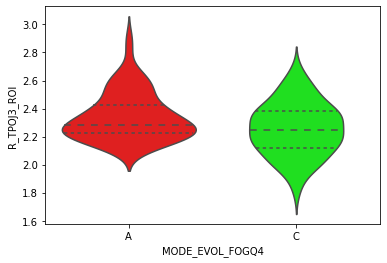

In [120]:
ColorTab = [(255/255,0/255,0/255,1),(255/255,255/255,49/255,1),(255/255,255/255,0/255,1),(0/255,255/255,0/255,1)]
ColorDic = {"A":ColorTab[0],"B1":ColorTab[1],"B2":ColorTab[2],"C":ColorTab[3]}

df_CT_TPOJ3 = pd.read_excel(os.path.join(STUDY_PATH,'TPOJ3.xlsx'),engine='openpyxl')
ax = sns.violinplot(x="MODE_EVOL_FOGQ4", y="R_TPOJ3_ROI",data=df_CT_TPOJ3,split=True,order=['A','C'],inner="quartile",palette=ColorDic)
plt.savefig(os.path.join(STUDY_PATH,"screenshots","R_TPOJ3_ROI.png"), dpi=300)

In [112]:
df_CT_NGC = pd.read_excel(os.path.join(STUDY_PATH,'T1_ThalamiPutamen.xlsx'),engine='openpyxl')
df_CT_NGC

,Identifiant,Difference_FOGQ4_V0_V1,MODE_EVOL_FOGQ4,3DT1_Median_Putamen_L,3DT1_Median_Thalamus_L,3DT1_Median_Thalamus_R
0,1005,2,C,95.214527,101.946548,105.124390
1,1006,0,B2,95.463177,106.261459,105.643074
2,1007,0,B2,88.792324,101.619484,102.478607
3,1008,-3,A,96.901348,102.194050,102.468193
4,1009,0,B2,93.597366,102.838116,103.913658
...,...,...,...,...,...,...
292,20009,-1,A,105.452633,107.813416,106.563213
293,20010,0,B2,99.632278,104.685349,103.928310
294,20011,0,B2,98.843773,100.471336,99.618484
295,20012,0,B2,100.275867,105.794060,105.842636


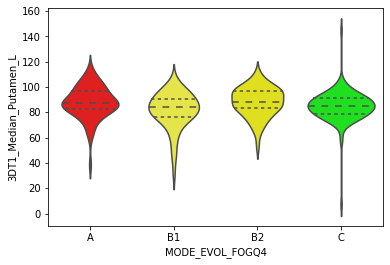

In [119]:
ax = sns.violinplot(x="MODE_EVOL_FOGQ4", y="3DT1_Median_Putamen_L",data=df_CT_NGC,split=True,order=['A','B1','B2','C'],inner="quartile",palette=ColorDic)
plt.savefig(os.path.join(STUDY_PATH,"screenshots","3DT1_Median_Putamen_L_fdr.png"), dpi=300)

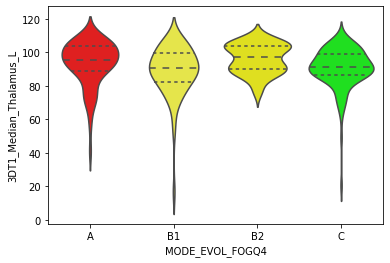

In [122]:
ax = sns.violinplot(x="MODE_EVOL_FOGQ4", y="3DT1_Median_Thalamus_L",data=df_CT_NGC,split=True,order=['A','B1','B2','C'],inner="quartile",palette=ColorDic)
plt.savefig(os.path.join(STUDY_PATH,"screenshots","3DT1_Median_Thalamus_L.png"), dpi=300)

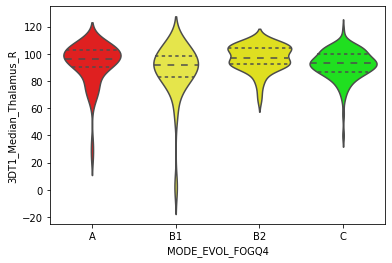

In [123]:
ax = sns.violinplot(x="MODE_EVOL_FOGQ4", y="3DT1_Median_Thalamus_R",data=df_CT_NGC,split=True,order=['A','B1','B2','C'],inner="quartile",palette=ColorDic)
plt.savefig(os.path.join(STUDY_PATH,"screenshots","3DT1_Median_Thalamus_R.png"), dpi=300)

In [45]:
#df = pd.read_excel(os.path.join(STUDY_PATH,'tableur_FOG_OHBM.xlsx'),engine='openpyxl',index_col=0,converters={'PatientNB':str})
df = pd.read_csv(os.path.join(STUDY_PATH,'tableur_FOG_OHBM.csv'),sep=',',index_col=0)
print(df.index)
df_CT = pd.read_csv(os.path.join(STUDY_PATH,'GlasserValues_CT.csv'),sep=';',index_col=0)
print(df_CT.index)

Index(['01005LB', '01006DF', '01007HC', '01008GM', '01009WF', '01010VD',
       '01012BB', '01013PR', '01014DE', '01016BP',
       ...
       '20001IA', '20003LM', '20005NT', '20006MJ', '20008JF', '20009AV',
       '20010MI', '20011CC', '20012DJ', '20015CM'],
      dtype='object', name='Identifiant', length=329)
Index(['01005LB', '01006DF', '01007HC', '01008GM', '01009WF', '01010VD',
       '01012BB', '01013PR', '01014DE', '01016BP',
       ...
       '20001IA', '20003LM', '20005NT', '20006MJ', '20008JF', '20009AV',
       '20010MI', '20011CC', '20012DJ', '20015CM'],
      dtype='object', name='Identifiant', length=301)


In [46]:
df_CT=df.merge(df_CT,on='Identifiant')
print(df_CT.shape)

(302, 370)


In [55]:
p_vals=[]

for col in df_CT.columns[10:20]:#["R_TPOJ3_ROI"]:
    NO_FOG_V1=df_CT.query("GROUP_V1_MET1 == 0")[col].values
    FOG_V1=df_CT.query("GROUP_V1_MET1 == 1")[col].values
    #stat,pval=stats.mannwhitneyu(df_CT.query("GROUP_V1_MET2 == 0")[col].values,df_CT.query("GROUP_V1_MET2 == 1")[col].values)
    stat,pval=stats.ttest_ind(df_CT.query("GROUP_V1_MET1 == 0")[col].values,df_CT.query("GROUP_V1_MET1 == 1")[col].values, equal_var=True)      
    p_vals.append(pval)

b_fdr,ps_fdr=sm.stats.multitest.fdrcorrection(p_vals,alpha=0.05,method='indep',is_sorted=False)  
print(p_vals)
print(ps_fdr)
print(ps_fdr[b_fdr])
df_CT.columns[b_fdr]

[0.4696224115243308, 0.5676862941228183, 0.5304031086557361, 0.6929979522172219, 0.6393532405853584, 0.1845305159279799, 0.9312400215433178, 0.5734216521814073, 0.0650534730062031, 0.35677211968862377]
[0.76999772 0.76999772 0.76999772 0.76999772 0.76999772 0.76999772
 0.93124002 0.76999772 0.65053473 0.76999772]
[]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 370 but corresponding boolean dimension is 10

NO FOG (mean/std) 2.2981957280117533 0.1990015128584291
FOG (mean/std) 2.313394489772817 0.178085170292823
pvalue :  0.493
col :  R_TPOJ3_ROI 302


/home/global/anaconda37/lib/python3.7/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.


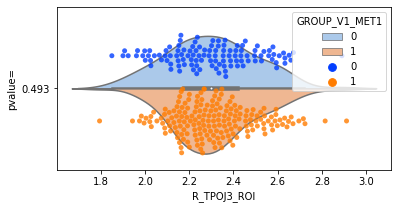

In [60]:
for col in ["R_TPOJ3_ROI"]:#df_CT.columns[10:]:#
    NO_FOG_V1=df_CT.query("GROUP_V1_MET1 == 0")[col].values
    FOG_V1=df_CT.query("GROUP_V1_MET1 == 1")[col].values
    #stat,pval=stats.mannwhitneyu(df_CT.query("GROUP_V1_MET2 == 0")[col].values,df_CT.query("GROUP_V1_MET2 == 1")[col].values)
    stat,pval=stats.ttest_ind(df_CT.query("GROUP_V1_MET1 == 0")[col].values,df_CT.query("GROUP_V1_MET1 == 1")[col].values, equal_var=True)      
    df_CT['pvalue='] = np.round(pval,3).astype(str)
    if (pval < 0.5) :
        print("NO FOG (mean/std)",NO_FOG_V1.mean(),NO_FOG_V1.std())
        print("FOG (mean/std)",FOG_V1.mean(),FOG_V1.std())
        print("pvalue : ", np.round(pval,3).astype(str))
        plt.figure(figsize=(6,3))
        #print(stats.ttest_ind(test.query("GROUPE == 1")['SN_L'].values,test.query("GROUPE == 2")['SN_L'].values, equal_var=False))  
        sns.violinplot(data=df_CT,y='pvalue=',x=col,split=True,hue="GROUP_V1_MET1",palette="pastel")
        sns.swarmplot(data=df_CT,y='pvalue=',x='R_TPOJ3_ROI',split=True,hue="GROUP_V1_MET1",palette="bright",alpha=0.8)
        print("col : ",col,df_CT.shape[0])

NO FOG (mean/std) 2.2981957280117533 0.1990015128584291
FOG (mean/std) 2.313394489772817 0.178085170292823
pvalue :  0.167
col :  R_TPOJ3_ROI 302


/home/global/anaconda37/lib/python3.7/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.


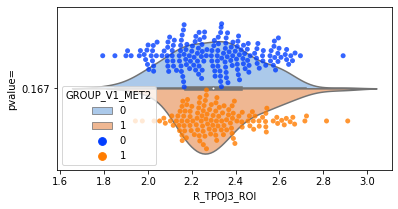

In [59]:
for col in ["R_TPOJ3_ROI"]:#df_CT.columns[10:]:#
    NO_FOG_V1=df_CT.query("GROUP_V1_MET1 == 0")[col].values
    FOG_V1=df_CT.query("GROUP_V1_MET1 == 1")[col].values
    #stat,pval=stats.mannwhitneyu(df_CT.query("GROUP_V1_MET2 == 0")[col].values,df_CT.query("GROUP_V1_MET2 == 1")[col].values)
    stat,pval=stats.ttest_ind(df_CT.query("GROUP_V1_MET2 == 0")[col].values,df_CT.query("GROUP_V1_MET2 == 1")[col].values, equal_var=True)      
    df_CT['pvalue='] = np.round(pval,3).astype(str)
    if (pval < 0.5) :
        print("NO FOG (mean/std)",NO_FOG_V1.mean(),NO_FOG_V1.std())
        print("FOG (mean/std)",FOG_V1.mean(),FOG_V1.std())
        print("pvalue : ", np.round(pval,3).astype(str))
        plt.figure(figsize=(6,3))
        #print(stats.ttest_ind(test.query("GROUPE == 1")['SN_L'].values,test.query("GROUPE == 2")['SN_L'].values, equal_var=False))  
        sns.violinplot(data=df_CT,y='pvalue=',x=col,split=True,hue="GROUP_V1_MET2",palette="pastel")
        sns.swarmplot(data=df_CT,y='pvalue=',x='R_TPOJ3_ROI',split=True,hue="GROUP_V1_MET2",palette="bright",alpha=0.8)
        print("col : ",col,df_CT.shape[0])

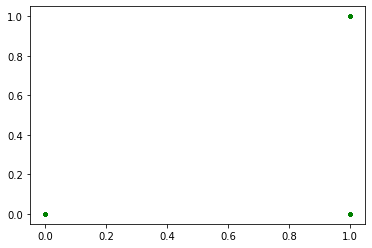

In [66]:
plt.plot(df_CT.GROUP_V1_MET1,df_CT.GROUP_V1_MET2,"g.")

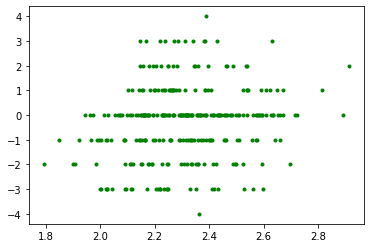

In [67]:
plt.plot(df_CT.R_TPOJ3_ROI,df_CT.SCORE_FOG,"g.")

ValueError: cannot reindex from a duplicate axis

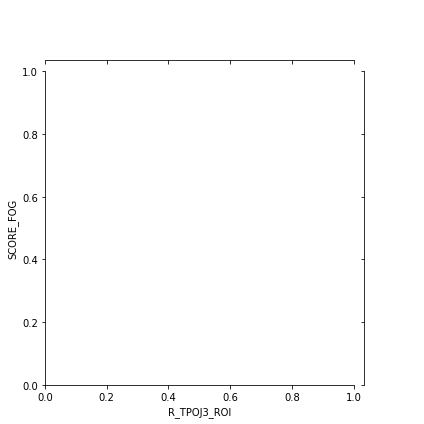

In [62]:
g = sns.jointplot(x="R_TPOJ3_ROI",y="SCORE_FOG",data=df_CT,kind="reg")